# Python for data analysis - One Million Song Dataset

## Importing libraries and resources

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
import scipy.stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline


## Importing data

In [26]:
features = ['year', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36 ', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53' , 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89', 'timbre90']

In [27]:
data=pd.read_csv('/Users/luciedrevet/Documents/S7/Python for data analysis/Projet/YearPredictionMSD.csv', names=features)

print('the number of rows and colums are'+str(data.shape))

the number of rows and colums are(515345, 91)


## EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       515345 non-null  int64  
 1   timbre1    515345 non-null  float64
 2   timbre2    515345 non-null  float64
 3   timbre3    515345 non-null  float64
 4   timbre4    515345 non-null  float64
 5   timbre5    515345 non-null  float64
 6   timbre6    515345 non-null  float64
 7   timbre7    515345 non-null  float64
 8   timbre8    515345 non-null  float64
 9   timbre9    515345 non-null  float64
 10  timbre10   515345 non-null  float64
 11  timbre11   515345 non-null  float64
 12  timbre12   515345 non-null  float64
 13  timbre13   515345 non-null  float64
 14  timbre14   515345 non-null  float64
 15  timbre15   515345 non-null  float64
 16  timbre16   515345 non-null  float64
 17  timbre17   515345 non-null  float64
 18  timbre18   515345 non-null  float64
 19  timbre19   515345 non-n

In [47]:
data.head(5)

,year,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,timbre90
0,2001,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,0.387704,...,-0.085335,0.108508,0.142775,-0.237355,0.049233,-0.356182,0.544458,-0.470599,-0.255977,0.042292
1,2001,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,1.420941,...,-0.314250,0.306236,-0.069483,0.052017,-0.632328,-0.436057,0.556448,0.568744,0.206940,1.158587
2,2001,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,1.166254,...,-0.396186,0.566683,-0.756534,-0.284019,-0.024220,0.223128,-0.509789,-0.338457,0.105819,-0.090208
3,2001,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,-0.016803,...,0.586237,-0.559427,-0.478689,-0.890161,-0.793906,0.567269,-0.263107,0.408116,0.967862,0.793384
4,2001,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,0.841844,...,-0.181585,0.099672,0.191319,-0.585576,-0.111877,-0.219960,0.448804,0.256882,0.192038,1.241363


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
timbre1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
timbre2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
timbre3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
timbre4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
...,...,...,...,...,...,...,...,...
timbre86,515345.0,17.669213,114.427905,-3168.92457,-31.58061,15.59847,67.79496,3662.06565
timbre87,515345.0,-26.315336,173.977336,-4319.99232,-101.53030,-21.20412,52.38933,2833.60895
timbre88,515345.0,4.458641,13.346557,-236.03926,-2.56609,3.11764,9.96774,463.41950
timbre89,515345.0,20.035136,185.558247,-7458.37815,-59.50927,7.75973,86.35161,7393.39844


Text(0.5, 1.0, 'Downsampled dataset')

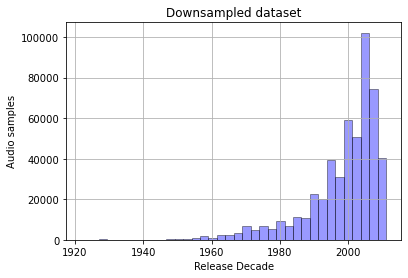

In [10]:
sns.distplot(data['year'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")

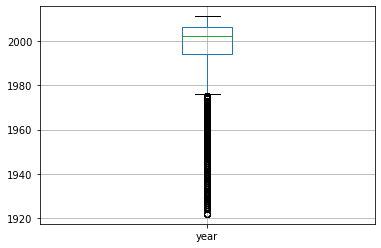

In [11]:
boxplot = data.boxplot(column=['year'])
boxplot

In [12]:
print("(Year, Features) {}".format(data.iloc[:,:1].shape))
data.iloc[:,:1].describe()

(Year, Features) (515345, 1)


,year
count,515345.000000
mean,1998.397082
std,10.931046
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2011.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef3e3a1c0>,
      dtype=object)

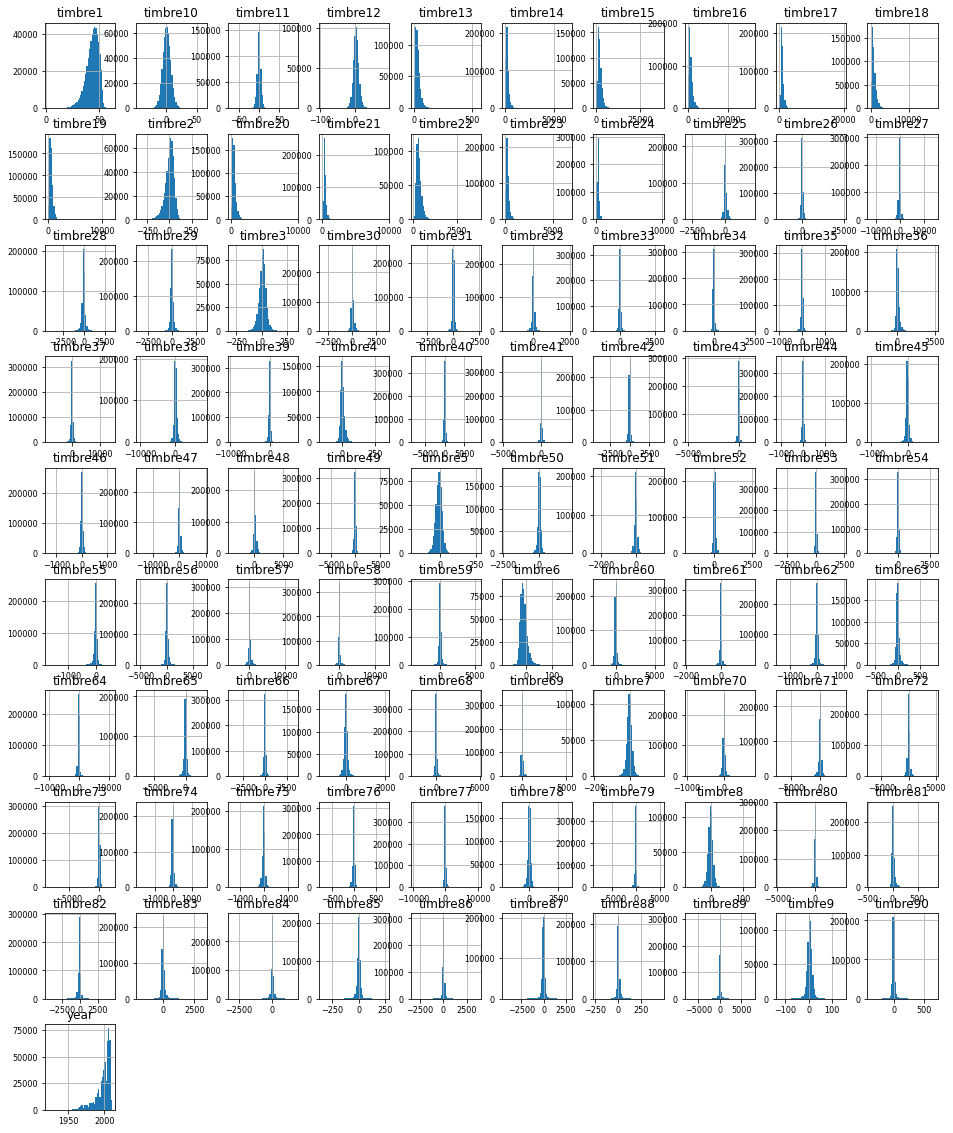

In [11]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [28]:
#We normalize the data
scaler = preprocessing.StandardScaler().fit(data.iloc[:,1:])
data.iloc[:,1:] = scaler.transform(data.iloc[:,1:])

In [65]:
data.describe()

,year,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,timbre90
count,515345.000000,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,...,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05,5.153450e+05
mean,1998.397082,-1.159327e-16,4.304351e-18,8.638754e-17,2.220121e-16,1.515250e-16,4.187500e-17,8.729678e-17,-3.887574e-17,-1.690502e-18,...,3.745582e-17,-5.435784e-18,2.340922e-17,3.046621e-17,3.030151e-17,2.383766e-17,3.207234e-17,-5.280391e-17,-1.448447e-16,-1.100216e-17
std,10.931046,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1922.000000,-6.862425e+00,-6.560296e+00,-8.780157e+00,-9.517237e+00,-7.672525e+00,-5.620919e+00,-1.275218e+01,-8.878982e+00,-1.230358e+01,...,-1.412720e+01,-2.464951e+01,-1.515382e+01,-3.299597e+01,-2.116757e+01,-2.784808e+01,-2.467954e+01,-1.801949e+01,-4.030228e+01,-1.732814e+01
25%,1994.000000,-5.657035e-01,-5.302232e-01,-5.705099e-01,-5.912981e-01,-6.173394e-01,-6.936690e-01,-5.757337e-01,-5.870530e-01,-5.689900e-01,...,-5.472982e-01,-3.763475e-01,-5.115765e-01,-4.482211e-01,-4.391444e-01,-4.304009e-01,-4.323266e-01,-5.263334e-01,-4.286766e-01,-4.594830e-01
50%,2002.000000,1.436122e-01,1.381980e-01,5.154657e-02,-1.113147e-01,2.387631e-02,-1.296040e-01,2.363593e-02,7.130436e-03,8.923323e-03,...,-2.050977e-01,1.159981e-01,-1.043238e-01,-4.534944e-02,3.125211e-02,-1.809651e-02,2.937866e-02,-1.004755e-01,-6.615399e-02,-5.776998e-02
75%,2006.000000,7.328761e-01,6.753442e-01,5.984502e-01,4.670417e-01,6.253278e-01,5.547643e-01,6.107436e-01,5.910085e-01,5.890610e-01,...,3.277011e-01,4.950510e-01,3.936830e-01,4.192683e-01,5.046013e-01,4.380557e-01,4.523850e-01,4.127734e-01,3.573893e-01,3.780426e-01
max,2011.000000,3.062687e+00,7.420976e+00,8.908591e+00,2.049944e+01,1.175037e+01,1.366950e+01,1.199530e+01,1.613981e+01,1.347180e+01,...,2.570804e+01,2.586806e+01,2.592811e+01,1.784467e+01,1.610155e+01,3.184887e+01,1.643850e+01,3.438799e+01,3.973615e+01,3.062991e+01


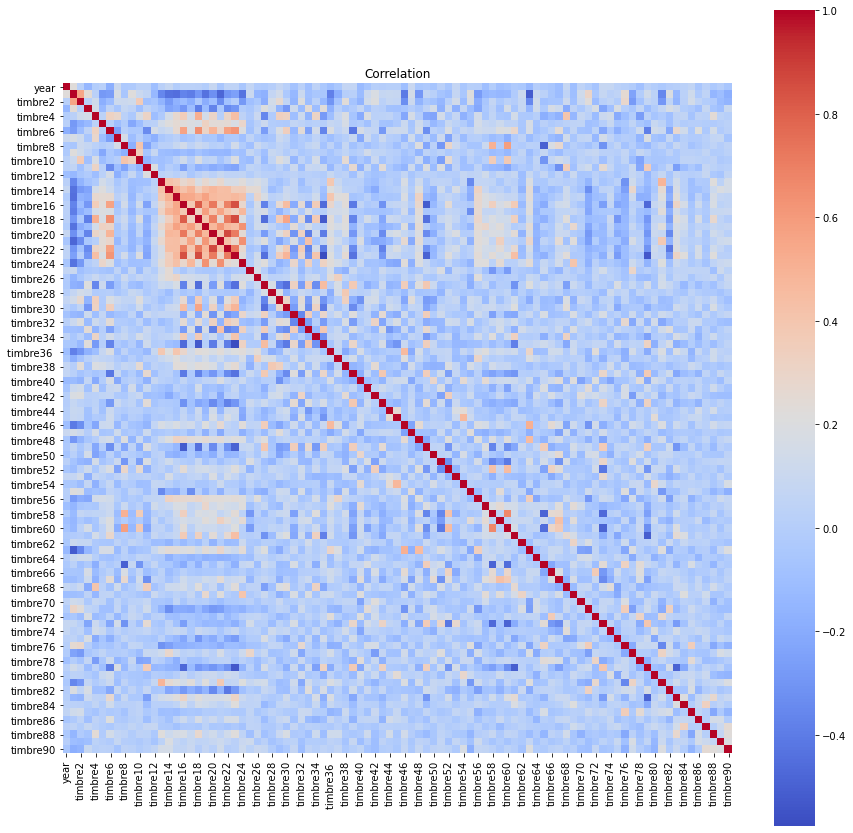

In [66]:
corr = data.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(15,15)) 
plt.title("Correlation")
sns.heatmap(corr, square=True, cmap='coolwarm', annot=False)
plt.show()

In [29]:
data.grouped=pd.read_csv('/Users/luciedrevet/Documents/S7/Python for data analysis/Projet/YearPredictionMSD.csv', names=features)
data.grouped['year'] = data.grouped.year.apply(lambda year : year-(year%10))
scaler = preprocessing.StandardScaler().fit(data.grouped.iloc[:,1:])
data.grouped.iloc[:,1:] = scaler.transform(data.grouped.iloc[:,1:])

<ipython-input-29-27cbf540a673>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.grouped=pd.read_csv('/Users/luciedrevet/Documents/S7/Python for data analysis/Projet/YearPredictionMSD.csv', names=features)


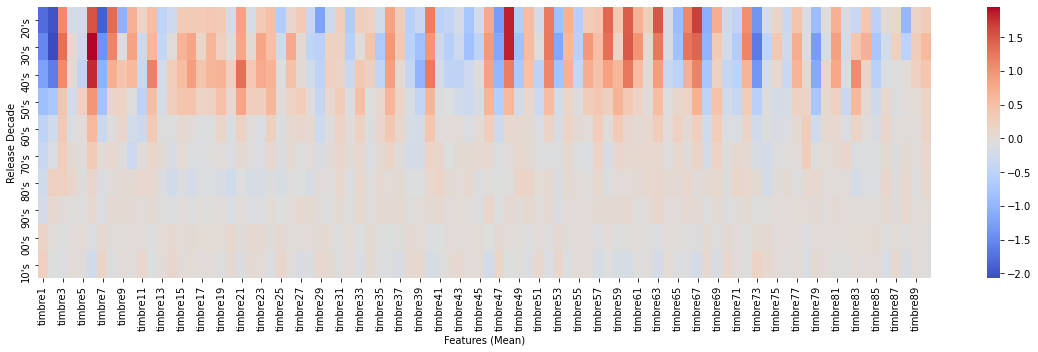

In [70]:
columns = data.grouped.groupby(['year']).mean().columns
labels = ["{:02d}'s".format(l%100) for l in sorted(data.grouped.year.unique())]
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(data.grouped.groupby(['year']).mean().iloc[:,:], yticklabels=labels,cmap='coolwarm')
plt.ylabel("Release Decade")
plt.xlabel("Features (Mean)")
plt.show()

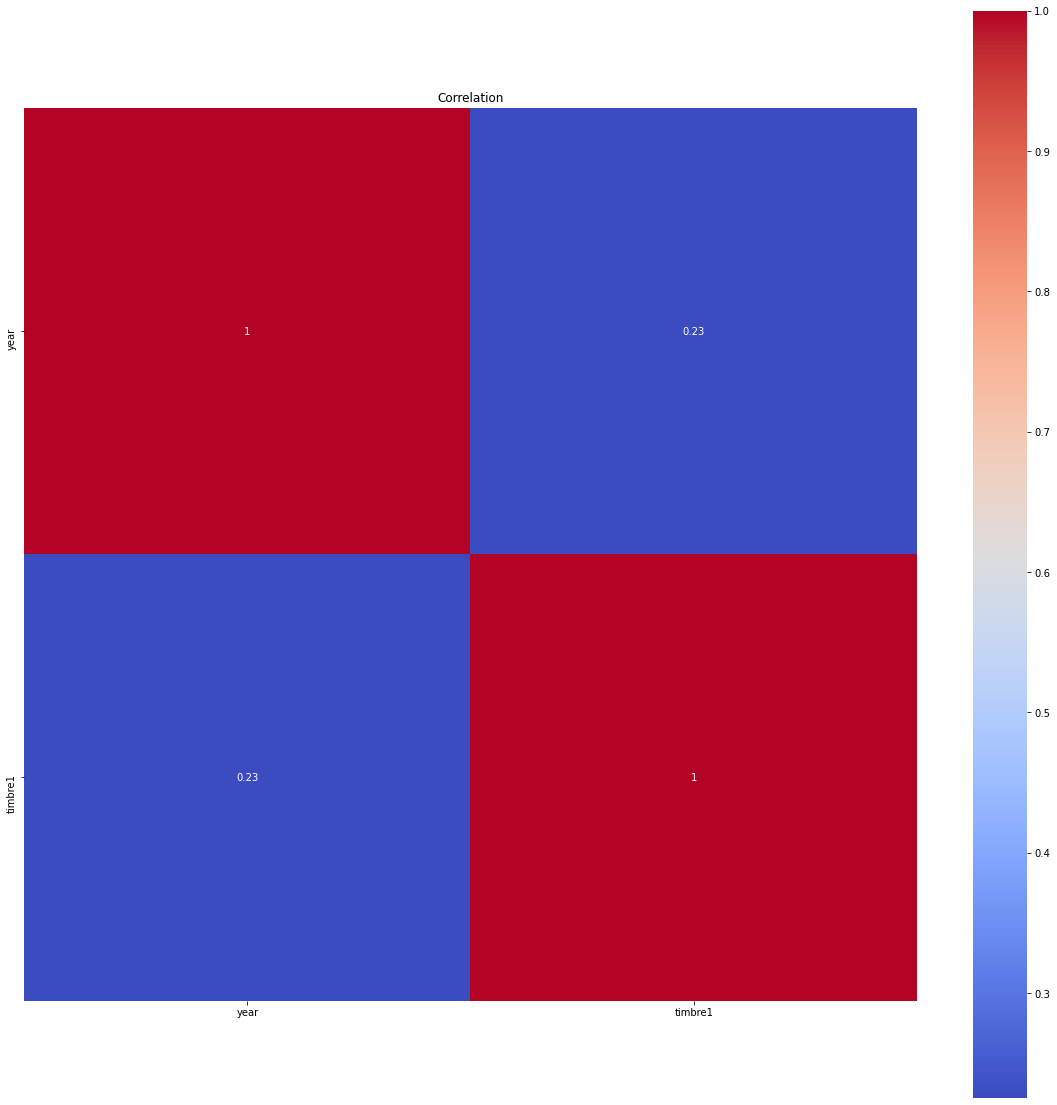

In [71]:
# Correlation between the release decade and the timbre1 feature
corr = data.iloc[:,:2].corr()
fig, ax = plt.subplots(figsize=(20,20)) 
plt.title("Correlation")
sns.heatmap(corr, square=True, cmap='coolwarm', annot=True)
plt.show()

## Preprocessing the data

In [44]:
data.shape

(71, 91)

In [30]:
# Separate train attributes and test into different dataframes
X = data.iloc[:,1:]
Y = data.iloc[:,0]
Y = Y - Y.min()    

Train = data.iloc[0:463715]
Test = data.iloc[463715:]

# Train set
X_train = X.iloc[0:463715].values
y_train = Y.iloc[0:463715].values

# Validation set
X_test = X.iloc[463715:].values
y_test = Y.iloc[463715:].values
print("Train : X ", X_train.shape, ", Y ", y_train.shape)
print("Test : X ", X_test.shape, ", Y ", y_test.shape)


Train : X  (463715, 90) , Y  (463715,)
Test : X  (51630, 90) , Y  (51630,)


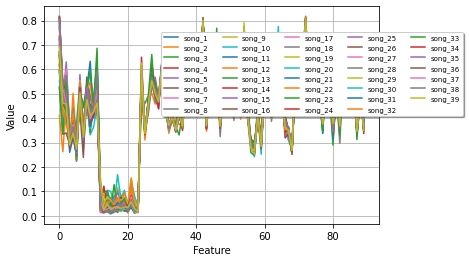

In [66]:
for i in range(1,40):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

## MODEL

In [ ]:
#LOGISTIC REGRESSION

In [96]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
predicted1 = clf1.predict(X_test)

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
predicted1=predicted1.round()

In [98]:
a1 = accuracy_score(y_test, predicted1)
a1

0.08349796629866357

In [99]:
all_acc = {"Acc_logistic", "Acc_DT", "Acc_NN", "Acc_NN_grouped","Acc_logistic_grouped"}

In [100]:
#DECISION TREE

In [101]:
clf2 = DecisionTreeRegressor()
clf2.fit(X_train, y_train)
predicted2 = clf2.predict(X_test)

In [102]:
predicted2 = predicted2.round()

In [103]:
a2 = accuracy_score(y_test, predicted2)
a2

0.05520046484601976

In [14]:
#Neural net

In [73]:
# Our deep learning library is Keras

from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.models import load_model
from keras.regularizers import l2
from keras.utils import np_utils
import numpy as np
# fixed random seed for reproducibility
np.random.seed(0)
import sys
sys.path.append("c:/ml/lib")
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [104]:
#X_test.shape[0]
Y_train = np_utils.to_categorical(y_train, 90)
Y_test = np_utils.to_categorical(y_test, 90)

In [105]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(90, input_shape=(90,), activation='tanh'))
model1.add(Dense(110, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(90, activation='sigmoid'))

In [106]:
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [107]:
h1=model1.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=5,
    validation_data=(X_test, Y_test)
)

Epoch 1/5
7246/7246 [==============================] - 7s 945us/step - loss: 0.0537 - accuracy: 0.0781 - val_loss: 0.0460 - val_accuracy: 0.0822
Epoch 2/5
7246/7246 [==============================] - 6s 878us/step - loss: 0.0462 - accuracy: 0.0870 - val_loss: 0.0457 - val_accuracy: 0.0851
Epoch 3/5
7246/7246 [==============================] - 6s 892us/step - loss: 0.0459 - accuracy: 0.0892 - val_loss: 0.0455 - val_accuracy: 0.0873
Epoch 4/5
7246/7246 [==============================] - 7s 903us/step - loss: 0.0457 - accuracy: 0.0911 - val_loss: 0.0454 - val_accuracy: 0.0899
Epoch 5/5
7246/7246 [==============================] - 7s 917us/step - loss: 0.0456 - accuracy: 0.0919 - val_loss: 0.0454 - val_accuracy: 0.0912


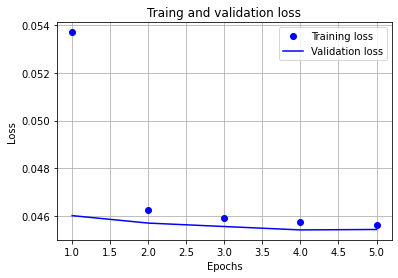

In [108]:
history_dict = h1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 5 + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

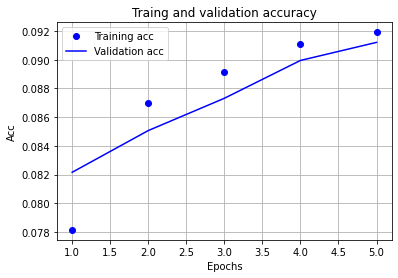

In [109]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 5 + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [110]:
P = model1.predict_classes(X_test)
P

array([85, 85, 85, ..., 76, 85, 85])

In [111]:
cnf_matrix1 = metrics.confusion_matrix(y_test, P)
a3 = accuracy_score(y_test, P)
a3

0.09120666279294984

<Figure size 432x288 with 0 Axes>

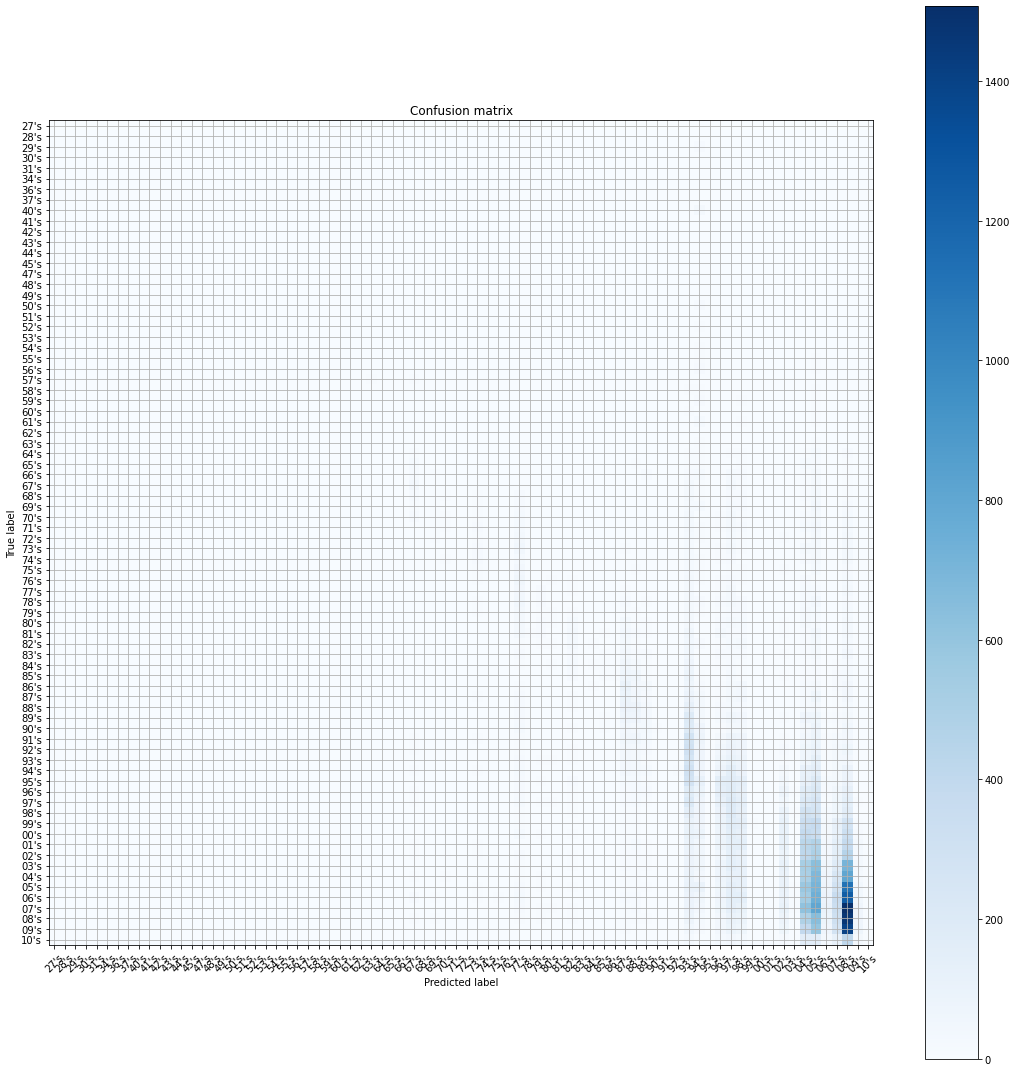

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(15,15)) 
labels = sorted(Test.year.unique())
plot_confusion_matrix(cnf_matrix1, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')


plt.show()

In [83]:
# separate train attributes and test into different dataframes
Xg = data.grouped.iloc[:,1:]
Yg = data.grouped.iloc[:,0]
Yg = Yg - Yg.min()    

Traing = data.grouped.iloc[0:463715]
Testg = data.grouped.iloc[463715:]

# Train set
X_traing = Xg.iloc[0:463715].values
y_traing = Yg.iloc[0:463715].values

# Validation set
X_testg = Xg.iloc[463715:].values
y_testg = Yg.iloc[463715:].values
print("Train grouped : X ", X_traing.shape, ", Y ", y_traing.shape)
print("Test grouped: X ", X_testg.shape, ", Y ", y_testg.shape)

Train grouped : X  (463715, 90) , Y  (463715,)
Test grouped: X  (51630, 90) , Y  (51630,)


In [84]:
Y_traing = np_utils.to_categorical(y_traing-1, 90)
Y_testg = np_utils.to_categorical(y_testg-1, 90)

In [93]:
def create_model(optimizer="RMSprop",loss ='binary_crossentropy' ):
    model = Sequential()
    model.add(Dense(90, input_shape=(90,), activation='relu'))
    model.add(Dense(110, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(90, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer,metrics=["accuracy"])
    return model

In [94]:
kears_estimator = KerasClassifier(build_fn=create_model, verbose=1, epochs = 5, batch_size = 64)

In [95]:
# Define the grid search parameters
param_grid = dict(loss = ['categorical_crossentropy','binary_crossentropy','sparse_categorical_crossentropy'],
                 optimizer = ['SGD','RMSprop','Adagrad','Adadelta','Adam'])

In [96]:
grid = GridSearchCV(estimator=kears_estimator,  
                    param_grid=param_grid,)

In [97]:
grid_result = grid.fit(X_traing, Y_traing )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/5
5797/5797 [==============================] - 4s 737us/step - loss: 1.4649 - accuracy: 0.5315
Epoch 2/5
5797/5797 [==============================] - 4s 700us/step - loss: 1.2780 - accuracy: 0.5728
Epoch 3/5
5797/5797 [==============================] - 4s 690us/step - loss: 1.2204 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 692us/step - loss: 1.2169 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 446us/step - loss: 1.2392 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 689us/step - loss: 1.4448 - accuracy: 0.5761
Epoch 2/5
5797/5797 [==============================] - 4s 684us/step - loss: 1.2316 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 693us/step - loss: 1.2234 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 686us/step - loss: 1.2205 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 443us/step - lo

1450/1450 [==============================] - 1s 505us/step - loss: 0.0216 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 729us/step - loss: 0.0881 - accuracy: 0.4941
Epoch 2/5
5797/5797 [==============================] - 4s 747us/step - loss: 0.0250 - accuracy: 0.5675
Epoch 3/5
5797/5797 [==============================] - 4s 737us/step - loss: 0.0238 - accuracy: 0.5758
Epoch 4/5
5797/5797 [==============================] - 5s 837us/step - loss: 0.0232 - accuracy: 0.5773
Epoch 5/5
1450/1450 [==============================] - 1s 581us/step - loss: 0.0218 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 5s 798us/step - loss: 0.0965 - accuracy: 0.4975
Epoch 2/5
5797/5797 [==============================] - 5s 792us/step - loss: 0.0249 - accuracy: 0.5672
Epoch 3/5
5797/5797 [==============================] - 5s 797us/step - loss: 0.0236 - accuracy: 0.5763
Epoch 4/5
5797/5797 [==============================] - 4s 769us/step - loss: 0.0231

5797/5797 [==============================] - 5s 918us/step - loss: 0.1612 - accuracy: 0.3786
Epoch 3/5
5797/5797 [==============================] - 5s 894us/step - loss: 0.0491 - accuracy: 0.5365
Epoch 4/5
5797/5797 [==============================] - 5s 867us/step - loss: 0.0356 - accuracy: 0.5418
Epoch 5/5
1450/1450 [==============================] - 1s 551us/step - loss: 0.0249 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 823us/step - loss: 0.5351 - accuracy: 0.0471
Epoch 2/5
5797/5797 [==============================] - 5s 803us/step - loss: 0.1568 - accuracy: 0.4459
Epoch 3/5
5797/5797 [==============================] - 5s 807us/step - loss: 0.0503 - accuracy: 0.5444
Epoch 4/5
5797/5797 [==============================] - 5s 803us/step - loss: 0.0366 - accuracy: 0.5457
Epoch 5/5
1450/1450 [==============================] - 1s 514us/step - loss: 0.0245 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 779us/step - loss: 0.5584

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
7246/7246 [==============================] - 6s 818us/step - loss: 0.0225 - accuracy: 0.5858
Epoch 2/5
7246/7246 [==============================] - 6s 837us/step - loss: 0.0192 - accuracy: 0.6082
Epoch 3/5
7246/7246 [==============================] - 6s 807us/step - loss: 0.0189 - accuracy: 0.6129
Epoch 4/5
7246/7246 [==============================] - 6s 805us/step - loss: 0.0187 - accuracy: 0.6163
Epoch 5/5
7246/7246 [==============================] - 6s 810us/step - loss: 0.0186 - accuracy: 0.6182
Best: 0.620853 using {'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


In [98]:
def create_model2(activation='relu'):
    model = Sequential()
    model.add(Dense(90, input_shape=(90,), activation=activation))
    model.add(Dense(110, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(90, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=["accuracy"])
    return model

In [99]:
kears_estimator2 = KerasClassifier(build_fn=create_model2, verbose=1, epochs = 5, batch_size = 64)

In [100]:
# Define the grid search parameters
param_grid2 = dict(activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

In [101]:
grid2 = GridSearchCV(estimator=kears_estimator2,  
                    param_grid=param_grid2,)

In [103]:
grid_result2 = grid2.fit(X_traing, Y_traing )

# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Epoch 1/5
5797/5797 [==============================] - 5s 891us/step - loss: 0.1042 - accuracy: 0.5828
Epoch 2/5
5797/5797 [==============================] - 6s 957us/step - loss: 0.0236 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 5s 903us/step - loss: 0.0219 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 5s 944us/step - loss: 0.0218 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 509us/step - loss: 0.0219 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 878us/step - loss: 0.1047 - accuracy: 0.5783
Epoch 2/5
5797/5797 [==============================] - 5s 876us/step - loss: 0.0236 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 5s 877us/step - loss: 0.0220 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 5s 884us/step - loss: 0.0219 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 521us/step - lo

Epoch 4/5
5797/5797 [==============================] - 5s 935us/step - loss: 0.0190 - accuracy: 0.6072
Epoch 5/5
1450/1450 [==============================] - 1s 683us/step - loss: 0.0187 - accuracy: 0.6110
Epoch 1/5
5797/5797 [==============================] - 7s 1ms/step - loss: 0.0244 - accuracy: 0.5811
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0208 - accuracy: 0.5868
Epoch 3/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0193 - accuracy: 0.6048
Epoch 4/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0190 - accuracy: 0.6101
Epoch 5/5
1450/1450 [==============================] - 1s 608us/step - loss: 0.0187 - accuracy: 0.6172
Epoch 1/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0236 - accuracy: 0.5808
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0195 - accuracy: 0.6041
Epoch 3/5
5797/5797 [==============================] - 6s 992us/step - loss: 0.0190 -

7246/7246 [==============================] - 7s 1ms/step - loss: 0.0188 - accuracy: 0.6130
Best: 0.619212 using {'activation': 'tanh'}


In [85]:
model2 = Sequential()
model2.add(Dense(90, input_shape=(90,), activation='tanh'))
model2.add(Dense(110, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(90, activation='sigmoid'))

In [86]:
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [87]:
h2=model2.fit(
    X_traing,
    Y_traing,
    batch_size=64,
    epochs=5,
    validation_data=(X_testg, Y_testg)
)

Epoch 1/5
7246/7246 [==============================] - 6s 879us/step - loss: 0.0255 - accuracy: 0.6157 - val_loss: 0.0179 - val_accuracy: 0.6317
Epoch 2/5
7246/7246 [==============================] - 6s 867us/step - loss: 0.0178 - accuracy: 0.6369 - val_loss: 0.0176 - val_accuracy: 0.6431
Epoch 3/5
7246/7246 [==============================] - 6s 868us/step - loss: 0.0175 - accuracy: 0.6432 - val_loss: 0.0175 - val_accuracy: 0.6421
Epoch 4/5
7246/7246 [==============================] - 6s 870us/step - loss: 0.0174 - accuracy: 0.6464 - val_loss: 0.0175 - val_accuracy: 0.6469
Epoch 5/5
7246/7246 [==============================] - 7s 964us/step - loss: 0.0173 - accuracy: 0.6489 - val_loss: 0.0175 - val_accuracy: 0.6439


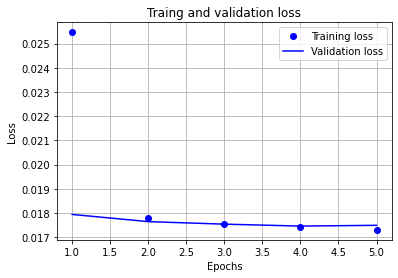

In [88]:
history_dict = h2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 5 + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

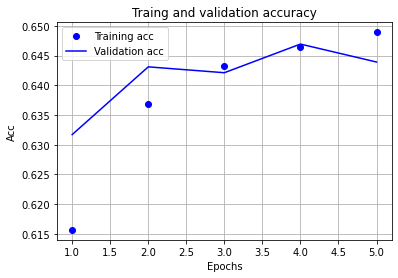

In [89]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 5 + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [90]:
P2 = model2.predict_classes(X_testg)
P2 = P2 + 1
P2

array([80, 80, 80, ..., 80, 80, 80])

In [91]:
cnf_matrix2 = metrics.confusion_matrix(y_testg, P2)
a4 = accuracy_score(y_testg, P2)
a4

0.6439279488669378

<Figure size 432x288 with 0 Axes>

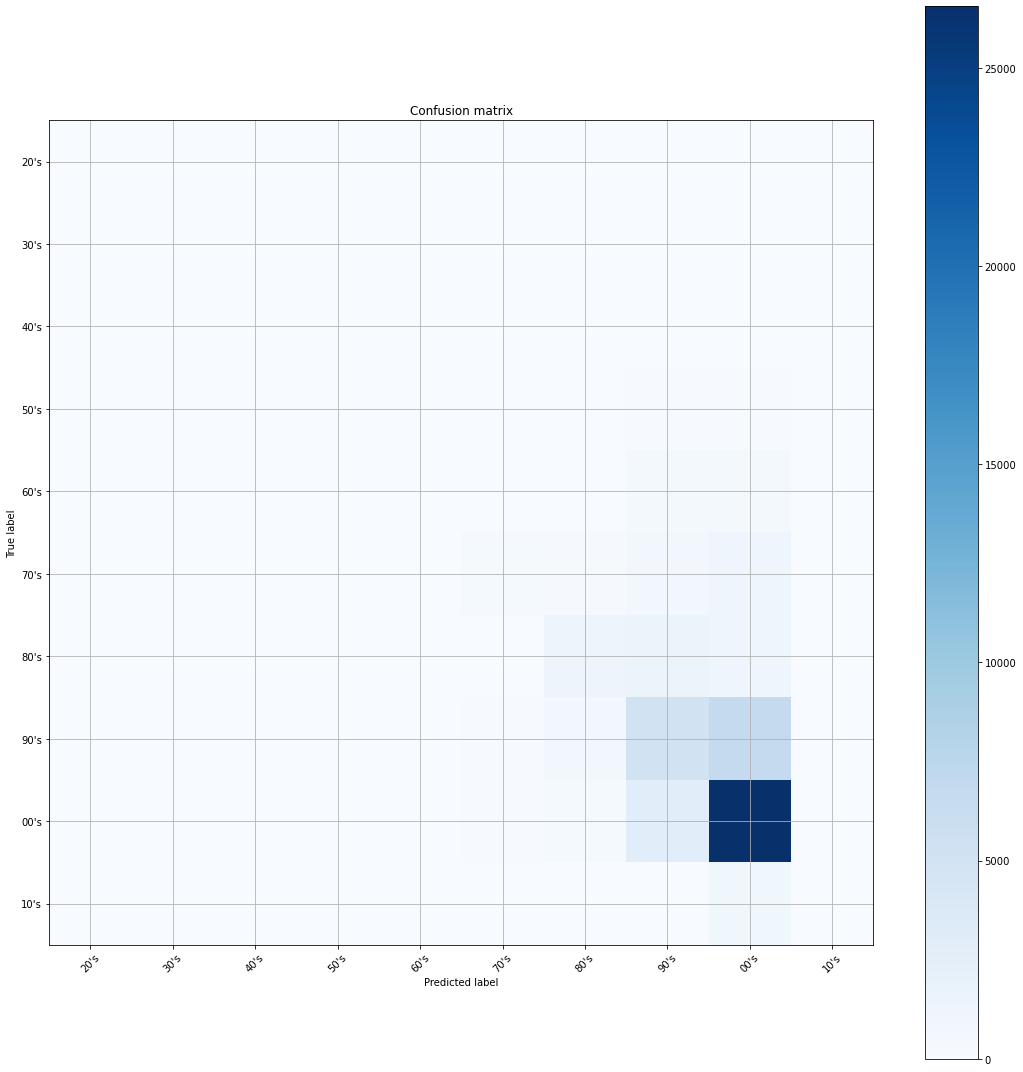

In [92]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(15,15)) 
labels = sorted(Testg.year.unique())
plot_confusion_matrix(cnf_matrix2, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')


plt.show()

In [93]:
clf5 = LogisticRegression()
clf5.fit(X_traing, y_traing)
predicted5 = clf5.predict(X_testg)

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
predicted5=predicted5.round()

In [95]:
a5 = accuracy_score(y_testg, predicted5)
a5

0.6111175673058299

In [112]:
all_acc = {"Acc_logistic":a1, "Acc_DT":a2, "Acc_NN":a3, "Acc_NN_grouped":a4,"Acc_logistic_grouped":a5}

<BarContainer object of 5 artists>

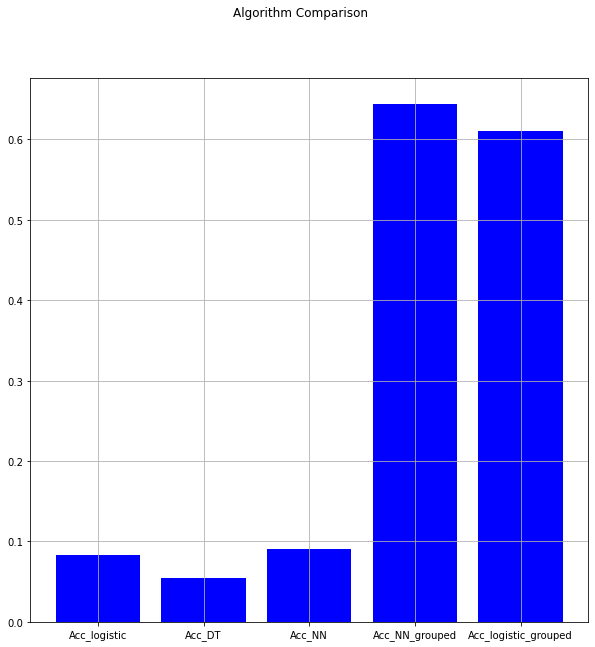

In [113]:
fig, ax = plt.subplots(figsize=(10,10)) 
fig.suptitle('Algorithm Comparison')
plt.bar(all_acc.keys(), all_acc.values(),  color='b')

## Simplar model for API

In [40]:
features = ['year', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36 ', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53' , 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89', 'timbre90']
databis=pd.read_csv('/Users/luciedrevet/Documents/S7/Python for data analysis/Projet/YearPredictionMSD.csv', names=features)
databis['year'] = databis.year.apply(lambda year : year-(year%10))
scaler = preprocessing.StandardScaler().fit(databis.iloc[:,1:])
databis.iloc[:,1:] = scaler.transform(databis.iloc[:,1:])

databis.drop(databis.iloc[:, 11:], inplace = True, axis = 1) 
databis.drop(databis.iloc[:, 7:10], inplace = True, axis = 1) 
databis.drop(databis.iloc[:,4:5], inplace = True, axis = 1)

# separate train attributes and test into different dataframes
Xgbis = databis.iloc[:,1:]
Ygbis = databis.iloc[:,0]
Ygbis = Ygbis - Ygbis.min()    

Traingbis = databis.iloc[0:463715]
Testgbis = databis.iloc[463715:]

# Train set
X_traingbis = Xgbis.iloc[0:463715].values
y_traingbis = Ygbis.iloc[0:463715].values

# Validation set
X_testgbis = Xgbis.iloc[463715:].values
y_testgbis = Ygbis.iloc[463715:].values
print("Train grouped : X ", X_traingbis.shape, ", Y ", y_traingbis.shape)
print("Test grouped: X ", X_testgbis.shape, ", Y ", y_testgbis.shape)

Y_traingbis = np_utils.to_categorical(y_traingbis-1, 90)
Y_testgbis = np_utils.to_categorical(y_testgbis-1, 90)

Train grouped : X  (463715, 6) , Y  (463715,)
Test grouped: X  (51630, 6) , Y  (51630,)


In [9]:
def create_model(optimizer="RMSprop",loss ='binary_crossentropy', activation = 'relu' ):
    model = Sequential()
    model.add(Dense(90, input_shape=(6,), activation=activation))
    model.add(Dense(110, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(90, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer,metrics=["accuracy"])
    return model

In [10]:
kears_estimator = KerasClassifier(build_fn=create_model, verbose=1, epochs = 5, batch_size = 64)

In [11]:
# Define the grid search parameters
param_grid = dict(loss = ['categorical_crossentropy','binary_crossentropy','sparse_categorical_crossentropy'],
                 optimizer = ['SGD','RMSprop','Adagrad','Adadelta','Adam'],
                 activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

In [12]:
grid = GridSearchCV(estimator=kears_estimator,  
                    param_grid=param_grid,)

In [13]:
grid_result = grid.fit(X_traingbis, Y_traingbis )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/5
5797/5797 [==============================] - 4s 718us/step - loss: 3.9588 - accuracy: 0.5827
Epoch 2/5
5797/5797 [==============================] - 4s 710us/step - loss: 3.6658 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 4s 704us/step - loss: 3.4254 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 730us/step - loss: 3.1655 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 455us/step - loss: 2.7680 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 705us/step - loss: 3.9600 - accuracy: 0.5786
Epoch 2/5
5797/5797 [==============================] - 4s 695us/step - loss: 3.6663 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 704us/step - loss: 3.4257 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 683us/step - loss: 3.1657 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 441us/step - lo

5797/5797 [==============================] - 4s 752us/step - loss: 4.3043 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 712us/step - loss: 4.2593 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 457us/step - loss: 4.2019 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 4s 742us/step - loss: 4.4347 - accuracy: 0.2417
Epoch 2/5
5797/5797 [==============================] - 4s 718us/step - loss: 4.3586 - accuracy: 0.3959
Epoch 3/5
5797/5797 [==============================] - 4s 717us/step - loss: 4.3042 - accuracy: 0.5769
Epoch 4/5
5797/5797 [==============================] - 4s 719us/step - loss: 4.2593 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 459us/step - loss: 4.2028 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 4s 742us/step - loss: 4.4927 - accuracy: 0.0982
Epoch 2/5
5797/5797 [==============================] - 4s 729us/step - loss: 4.4667

1450/1450 [==============================] - 1s 505us/step - loss: 0.2895 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 699us/step - loss: 0.6225 - accuracy: 0.5550
Epoch 2/5
5797/5797 [==============================] - 4s 691us/step - loss: 0.5067 - accuracy: 0.5776
Epoch 3/5
5797/5797 [==============================] - 4s 750us/step - loss: 0.4218 - accuracy: 0.5776
Epoch 4/5
5797/5797 [==============================] - 4s 748us/step - loss: 0.3584 - accuracy: 0.5776
Epoch 5/5
1450/1450 [==============================] - 1s 509us/step - loss: 0.2896 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 5s 935us/step - loss: 0.6227 - accuracy: 0.5383
Epoch 2/5
5797/5797 [==============================] - 5s 864us/step - loss: 0.5068 - accuracy: 0.5791
Epoch 3/5
5797/5797 [==============================] - 4s 758us/step - loss: 0.4219 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 5s 847us/step - loss: 0.3584

5797/5797 [==============================] - 5s 787us/step - loss: 0.6768 - accuracy: 0.5768
Epoch 3/5
5797/5797 [==============================] - 4s 732us/step - loss: 0.6629 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 755us/step - loss: 0.6488 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 495us/step - loss: 0.6279 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 776us/step - loss: 0.6882 - accuracy: 0.0390
Epoch 2/5
5797/5797 [==============================] - 4s 735us/step - loss: 0.6762 - accuracy: 0.5353
Epoch 3/5
5797/5797 [==============================] - 4s 757us/step - loss: 0.6623 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 756us/step - loss: 0.6482 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 503us/step - loss: 0.6273 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 765us/step - loss: 0.6895

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 767us/step - loss: 1.4468 - accuracy: 0.5564
Epoch 2/5
5797/5797 [==============================] - 4s 765us/step - loss: 1.2368 - accuracy: 0.5811
Epoch 3/5
5797/5797 [==============================] - 4s 768us/step - loss: 1.1360 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 760us/step - loss: 1.1194 - accuracy: 0.5835
Epoch 5/5
1450/1450 [==============================] - 1s 519us/step - loss: 1.1247 - accuracy: 0.5671
Epoch 1/5
5797/5797 [==============================] - 4s 772us/step - loss: 1.4043 - accuracy: 0.5739
Epoch 2/5
5797/5797 [==============================] - 4s 771us/step - loss: 1.1605 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 772us/step - loss: 1.1314 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 761us/step - loss: 1.1210 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 519us/step - lo

5797/5797 [==============================] - 5s 803us/step - loss: 1.2755 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 5s 781us/step - loss: 1.2455 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 527us/step - loss: 1.1575 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 5s 781us/step - loss: 1.8840 - accuracy: 0.4847
Epoch 2/5
5797/5797 [==============================] - 5s 782us/step - loss: 1.3294 - accuracy: 0.5279
Epoch 3/5
5797/5797 [==============================] - 5s 781us/step - loss: 1.3097 - accuracy: 0.5601
Epoch 4/5
5797/5797 [==============================] - 5s 814us/step - loss: 1.2719 - accuracy: 0.5810
Epoch 5/5
1450/1450 [==============================] - 1s 516us/step - loss: 1.1898 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 5s 792us/step - loss: 4.1054 - accuracy: 0.1096
Epoch 2/5
5797/5797 [==============================] - 5s 793us/step - loss: 1.9424

1450/1450 [==============================] - 1s 549us/step - loss: 0.0217 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 764us/step - loss: 0.0722 - accuracy: 0.5268
Epoch 2/5
5797/5797 [==============================] - 4s 741us/step - loss: 0.0256 - accuracy: 0.5683
Epoch 3/5
5797/5797 [==============================] - 4s 738us/step - loss: 0.0242 - accuracy: 0.5726
Epoch 4/5
5797/5797 [==============================] - 4s 740us/step - loss: 0.0235 - accuracy: 0.5751
Epoch 5/5
1450/1450 [==============================] - 1s 550us/step - loss: 0.0217 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 4s 765us/step - loss: 0.0790 - accuracy: 0.5055
Epoch 2/5
5797/5797 [==============================] - 4s 742us/step - loss: 0.0258 - accuracy: 0.5609
Epoch 3/5
5797/5797 [==============================] - 4s 737us/step - loss: 0.0242 - accuracy: 0.5703
Epoch 4/5
5797/5797 [==============================] - 5s 781us/step - loss: 0.0235

Epoch 2/5
5797/5797 [==============================] - 5s 848us/step - loss: 0.1646 - accuracy: 0.4663
Epoch 3/5
5797/5797 [==============================] - 5s 835us/step - loss: 0.0706 - accuracy: 0.5665
Epoch 4/5
5797/5797 [==============================] - 5s 816us/step - loss: 0.0472 - accuracy: 0.5698
Epoch 5/5
1450/1450 [==============================] - 1s 559us/step - loss: 0.0308 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 809us/step - loss: 0.5621 - accuracy: 0.0336
Epoch 2/5
5797/5797 [==============================] - 5s 835us/step - loss: 0.1862 - accuracy: 0.4356
Epoch 3/5
5797/5797 [==============================] - 5s 839us/step - loss: 0.0756 - accuracy: 0.5558
Epoch 4/5
5797/5797 [==============================] - 5s 819us/step - loss: 0.0488 - accuracy: 0.5608
Epoch 5/5
1450/1450 [==============================] - 1s 560us/step - loss: 0.0309 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 803us/step - lo

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 678us/step - loss: 2.7850 - accuracy: 0.5743
Epoch 2/5
5797/5797 [==============================] - 4s 673us/step - loss: 1.3144 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 4s 674us/step - loss: 1.2560 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 703us/step - loss: 1.2360 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 492us/step - loss: 1.2240 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 688us/step - loss: 2.7206 - accuracy: 0.5706
Epoch 2/5
5797/5797 [==============================] - 4s 728us/step - loss: 1.3212 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 690us/step - loss: 1.2693 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 731us/step - loss: 1.2440 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 455us/step - lo

5797/5797 [==============================] - 4s 763us/step - loss: 2.4086 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 710us/step - loss: 1.5927 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 464us/step - loss: 1.3268 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 4s 713us/step - loss: 4.1092 - accuracy: 0.5007
Epoch 2/5
5797/5797 [==============================] - 4s 713us/step - loss: 3.5156 - accuracy: 0.5818
Epoch 3/5
5797/5797 [==============================] - 4s 731us/step - loss: 2.3619 - accuracy: 0.5822
Epoch 4/5
5797/5797 [==============================] - 4s 734us/step - loss: 1.5897 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 468us/step - loss: 1.3436 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 4s 756us/step - loss: 4.4575 - accuracy: 0.0794
Epoch 2/5
5797/5797 [==============================] - 4s 746us/step - loss: 4.3511

1450/1450 [==============================] - 1s 543us/step - loss: 0.0299 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 757us/step - loss: 0.4560 - accuracy: 0.3632
Epoch 2/5
5797/5797 [==============================] - 4s 763us/step - loss: 0.0985 - accuracy: 0.5776
Epoch 3/5
5797/5797 [==============================] - 4s 762us/step - loss: 0.0479 - accuracy: 0.5776
Epoch 4/5
5797/5797 [==============================] - 4s 757us/step - loss: 0.0366 - accuracy: 0.5776
Epoch 5/5
1450/1450 [==============================] - 1s 513us/step - loss: 0.0295 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 4s 742us/step - loss: 0.4624 - accuracy: 0.3533
Epoch 2/5
5797/5797 [==============================] - 4s 742us/step - loss: 0.1003 - accuracy: 0.5791
Epoch 3/5
5797/5797 [==============================] - 4s 747us/step - loss: 0.0481 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 744us/step - loss: 0.0367

Epoch 2/5
5797/5797 [==============================] - 5s 874us/step - loss: 0.6656 - accuracy: 0.0379
Epoch 3/5
5797/5797 [==============================] - 5s 875us/step - loss: 0.6365 - accuracy: 0.0906
Epoch 4/5
5797/5797 [==============================] - 5s 847us/step - loss: 0.6011 - accuracy: 0.1888
Epoch 5/5
1450/1450 [==============================] - 1s 539us/step - loss: 0.5312 - accuracy: 0.4871
Epoch 1/5
5797/5797 [==============================] - 5s 809us/step - loss: 0.6886 - accuracy: 0.0059
Epoch 2/5
5797/5797 [==============================] - 5s 804us/step - loss: 0.6635 - accuracy: 0.0060
Epoch 3/5
5797/5797 [==============================] - 5s 806us/step - loss: 0.6311 - accuracy: 0.0062
Epoch 4/5
5797/5797 [==============================] - 5s 802us/step - loss: 0.5905 - accuracy: 0.0076
Epoch 5/5
1450/1450 [==============================] - 1s 521us/step - loss: 0.5081 - accuracy: 0.0131
Epoch 1/5
5797/5797 [==============================] - 5s 809us/step - lo

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 5s 837us/step - loss: 1.9569 - accuracy: 0.4689
Epoch 2/5
5797/5797 [==============================] - 5s 823us/step - loss: 1.2293 - accuracy: 0.3357
Epoch 3/5
5797/5797 [==============================] - 5s 833us/step - loss: 1.2148 - accuracy: 0.3107
Epoch 4/5
5797/5797 [==============================] - 5s 823us/step - loss: 1.2100 - accuracy: 0.3017
Epoch 5/5
1450/1450 [==============================] - 1s 506us/step - loss: 1.2088 - accuracy: 0.2743
Epoch 1/5
5797/5797 [==============================] - 4s 776us/step - loss: 1.8855 - accuracy: 0.4589
Epoch 2/5
5797/5797 [==============================] - 4s 771us/step - loss: 1.2275 - accuracy: 0.3227
Epoch 3/5
5797/5797 [==============================] - 4s 771us/step - loss: 1.2155 - accuracy: 0.3018
Epoch 4/5
5797/5797 [==============================] - 4s 770us/step - loss: 1.2116 - accuracy: 0.2949
Epoch 5/5
1450/1450 [==============================] - 1s 586us/step - lo

5797/5797 [==============================] - 5s 856us/step - loss: 1.4559 - accuracy: 0.5406
Epoch 4/5
5797/5797 [==============================] - 5s 842us/step - loss: 1.4382 - accuracy: 0.5282
Epoch 5/5
1450/1450 [==============================] - 1s 535us/step - loss: 1.2428 - accuracy: 0.5253
Epoch 1/5
5797/5797 [==============================] - 5s 808us/step - loss: 3.5463 - accuracy: 0.5491
Epoch 2/5
5797/5797 [==============================] - 5s 799us/step - loss: 1.6148 - accuracy: 0.5669
Epoch 3/5
5797/5797 [==============================] - 5s 780us/step - loss: 1.3464 - accuracy: 0.5432
Epoch 4/5
5797/5797 [==============================] - 4s 745us/step - loss: 1.2857 - accuracy: 0.5275
Epoch 5/5
1450/1450 [==============================] - 1s 470us/step - loss: 1.2453 - accuracy: 0.5213
Epoch 1/5
5797/5797 [==============================] - 4s 756us/step - loss: 4.3828 - accuracy: 0.2535
Epoch 2/5
5797/5797 [==============================] - 4s 758us/step - loss: 4.1374

1450/1450 [==============================] - 1s 522us/step - loss: 0.0216 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 736us/step - loss: 0.2613 - accuracy: 0.3891
Epoch 2/5
5797/5797 [==============================] - 4s 726us/step - loss: 0.0294 - accuracy: 0.5702
Epoch 3/5
5797/5797 [==============================] - 4s 723us/step - loss: 0.0248 - accuracy: 0.5741
Epoch 4/5
5797/5797 [==============================] - 4s 724us/step - loss: 0.0235 - accuracy: 0.5759
Epoch 5/5
1450/1450 [==============================] - 1s 504us/step - loss: 0.0213 - accuracy: 0.5915
Epoch 1/5
5797/5797 [==============================] - 4s 711us/step - loss: 0.2539 - accuracy: 0.4008
Epoch 2/5
5797/5797 [==============================] - 4s 715us/step - loss: 0.0295 - accuracy: 0.5731
Epoch 3/5
5797/5797 [==============================] - 4s 712us/step - loss: 0.0251 - accuracy: 0.5741
Epoch 4/5
5797/5797 [==============================] - 4s 706us/step - loss: 0.0238

Epoch 2/5
5797/5797 [==============================] - 5s 807us/step - loss: 0.6205 - accuracy: 0.0776
Epoch 3/5
5797/5797 [==============================] - 5s 798us/step - loss: 0.5341 - accuracy: 0.2276
Epoch 4/5
5797/5797 [==============================] - 5s 806us/step - loss: 0.4030 - accuracy: 0.4521
Epoch 5/5
1450/1450 [==============================] - 1s 506us/step - loss: 0.1907 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 799us/step - loss: 0.6723 - accuracy: 0.0012
Epoch 2/5
5797/5797 [==============================] - 5s 798us/step - loss: 0.6211 - accuracy: 0.0097
Epoch 3/5
5797/5797 [==============================] - 5s 801us/step - loss: 0.5386 - accuracy: 0.0451
Epoch 4/5
5797/5797 [==============================] - 5s 795us/step - loss: 0.4151 - accuracy: 0.1655
Epoch 5/5
1450/1450 [==============================] - 1s 516us/step - loss: 0.2059 - accuracy: 0.5813
Epoch 1/5
5797/5797 [==============================] - 5s 790us/step - lo

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 674us/step - loss: 2.1121 - accuracy: 0.5710
Epoch 2/5
5797/5797 [==============================] - 4s 664us/step - loss: 1.2504 - accuracy: 0.5830
Epoch 3/5
5797/5797 [==============================] - 4s 669us/step - loss: 1.2297 - accuracy: 0.5833
Epoch 4/5
5797/5797 [==============================] - 4s 682us/step - loss: 1.2228 - accuracy: 0.5835
Epoch 5/5
1450/1450 [==============================] - 1s 470us/step - loss: 1.2144 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 724us/step - loss: 2.1147 - accuracy: 0.5694
Epoch 2/5
5797/5797 [==============================] - 4s 745us/step - loss: 1.2498 - accuracy: 0.5791
Epoch 3/5
5797/5797 [==============================] - 4s 748us/step - loss: 1.2314 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 747us/step - loss: 1.2244 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 484us/step - lo

5797/5797 [==============================] - 4s 749us/step - loss: 1.4183 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 748us/step - loss: 1.3058 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 466us/step - loss: 1.2485 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 724us/step - loss: 3.9960 - accuracy: 0.4986
Epoch 2/5
5797/5797 [==============================] - 4s 732us/step - loss: 2.6148 - accuracy: 0.5818
Epoch 3/5
5797/5797 [==============================] - 4s 733us/step - loss: 1.4477 - accuracy: 0.5822
Epoch 4/5
5797/5797 [==============================] - 5s 815us/step - loss: 1.3031 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 476us/step - loss: 1.2652 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 5s 793us/step - loss: 4.4489 - accuracy: 0.0255
Epoch 2/5
5797/5797 [==============================] - 5s 780us/step - loss: 4.3304

1450/1450 [==============================] - 1s 532us/step - loss: 0.0245 - accuracy: 0.5849
Epoch 1/5
5797/5797 [==============================] - 4s 728us/step - loss: 0.3104 - accuracy: 0.4482
Epoch 2/5
5797/5797 [==============================] - 4s 733us/step - loss: 0.0433 - accuracy: 0.5773
Epoch 3/5
5797/5797 [==============================] - 4s 729us/step - loss: 0.0313 - accuracy: 0.5772
Epoch 4/5
5797/5797 [==============================] - 4s 730us/step - loss: 0.0279 - accuracy: 0.5771
Epoch 5/5
1450/1450 [==============================] - 1s 514us/step - loss: 0.0246 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 4s 740us/step - loss: 0.3165 - accuracy: 0.4206
Epoch 2/5
5797/5797 [==============================] - 4s 743us/step - loss: 0.0436 - accuracy: 0.5787
Epoch 3/5
5797/5797 [==============================] - 4s 729us/step - loss: 0.0313 - accuracy: 0.5783
Epoch 4/5
5797/5797 [==============================] - 4s 711us/step - loss: 0.0279

5797/5797 [==============================] - 5s 806us/step - loss: 0.6651 - accuracy: 0.0255
Epoch 3/5
5797/5797 [==============================] - 5s 803us/step - loss: 0.6228 - accuracy: 0.0651
Epoch 4/5
5797/5797 [==============================] - 5s 801us/step - loss: 0.5580 - accuracy: 0.1641
Epoch 5/5
1450/1450 [==============================] - 1s 531us/step - loss: 0.3941 - accuracy: 0.5098
Epoch 1/5
5797/5797 [==============================] - 5s 795us/step - loss: 0.6952 - accuracy: 0.0131
Epoch 2/5
5797/5797 [==============================] - 5s 785us/step - loss: 0.6645 - accuracy: 0.0352
Epoch 3/5
5797/5797 [==============================] - 5s 784us/step - loss: 0.6201 - accuracy: 0.0795
Epoch 4/5
5797/5797 [==============================] - 5s 781us/step - loss: 0.5514 - accuracy: 0.1560
Epoch 5/5
1450/1450 [==============================] - 1s 516us/step - loss: 0.3783 - accuracy: 0.5010
Epoch 1/5
5797/5797 [==============================] - 5s 793us/step - loss: 0.6949

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 675us/step - loss: 1.7481 - accuracy: 0.5805
Epoch 2/5
5797/5797 [==============================] - 4s 676us/step - loss: 1.2327 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 4s 695us/step - loss: 1.2182 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 691us/step - loss: 1.2133 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 470us/step - loss: 1.2163 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 726us/step - loss: 1.8024 - accuracy: 0.5752
Epoch 2/5
5797/5797 [==============================] - 4s 747us/step - loss: 1.2486 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 750us/step - loss: 1.2233 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 748us/step - loss: 1.2168 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 504us/step - lo

5797/5797 [==============================] - 5s 794us/step - loss: 1.3370 - accuracy: 0.5753
Epoch 4/5
5797/5797 [==============================] - 4s 772us/step - loss: 1.2709 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 496us/step - loss: 1.2164 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 4s 766us/step - loss: 2.7968 - accuracy: 0.3627
Epoch 2/5
5797/5797 [==============================] - 4s 766us/step - loss: 1.4424 - accuracy: 0.4687
Epoch 3/5
5797/5797 [==============================] - 4s 750us/step - loss: 1.3339 - accuracy: 0.5722
Epoch 4/5
5797/5797 [==============================] - 4s 741us/step - loss: 1.2710 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 484us/step - loss: 1.2405 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 5s 776us/step - loss: 4.0303 - accuracy: 0.2511
Epoch 2/5
5797/5797 [==============================] - 4s 770us/step - loss: 3.1106

1450/1450 [==============================] - 1s 540us/step - loss: 0.0252 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 767us/step - loss: 0.1602 - accuracy: 0.4986
Epoch 2/5
5797/5797 [==============================] - 5s 785us/step - loss: 0.0406 - accuracy: 0.5773
Epoch 3/5
5797/5797 [==============================] - 5s 787us/step - loss: 0.0316 - accuracy: 0.5773
Epoch 4/5
5797/5797 [==============================] - 5s 787us/step - loss: 0.0284 - accuracy: 0.5773
Epoch 5/5
1450/1450 [==============================] - 1s 556us/step - loss: 0.0252 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 5s 801us/step - loss: 0.1501 - accuracy: 0.5309
Epoch 2/5
5797/5797 [==============================] - 5s 792us/step - loss: 0.0402 - accuracy: 0.5769
Epoch 3/5
5797/5797 [==============================] - 5s 783us/step - loss: 0.0315 - accuracy: 0.5766
Epoch 4/5
5797/5797 [==============================] - 5s 788us/step - loss: 0.0284

5797/5797 [==============================] - 5s 820us/step - loss: 0.3480 - accuracy: 0.2961
Epoch 3/5
5797/5797 [==============================] - 5s 837us/step - loss: 0.2170 - accuracy: 0.5665
Epoch 4/5
5797/5797 [==============================] - 5s 841us/step - loss: 0.1506 - accuracy: 0.5821
Epoch 5/5
1450/1450 [==============================] - 1s 545us/step - loss: 0.0967 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 824us/step - loss: 0.5999 - accuracy: 0.3101
Epoch 2/5
5797/5797 [==============================] - 5s 824us/step - loss: 0.3451 - accuracy: 0.5610
Epoch 3/5
5797/5797 [==============================] - 5s 813us/step - loss: 0.2161 - accuracy: 0.5784
Epoch 4/5
5797/5797 [==============================] - 5s 813us/step - loss: 0.1506 - accuracy: 0.5789
Epoch 5/5
1450/1450 [==============================] - 1s 523us/step - loss: 0.0968 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 783us/step - loss: 0.5522

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 718us/step - loss: 1.7846 - accuracy: 0.5803
Epoch 2/5
5797/5797 [==============================] - 4s 736us/step - loss: 1.2389 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 4s 728us/step - loss: 1.2177 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 720us/step - loss: 1.2114 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 466us/step - loss: 1.2118 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 789us/step - loss: 1.7903 - accuracy: 0.5751
Epoch 2/5
5797/5797 [==============================] - 5s 810us/step - loss: 1.2533 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 5s 839us/step - loss: 1.2230 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 5s 849us/step - loss: 1.2168 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 519us/step - lo

5797/5797 [==============================] - 5s 844us/step - loss: 1.3369 - accuracy: 0.5764
Epoch 4/5
5797/5797 [==============================] - 5s 845us/step - loss: 1.3056 - accuracy: 0.5791
Epoch 5/5
1450/1450 [==============================] - 1s 489us/step - loss: 1.2161 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 5s 837us/step - loss: 2.8618 - accuracy: 0.4256
Epoch 2/5
5797/5797 [==============================] - 5s 837us/step - loss: 1.4436 - accuracy: 0.5178
Epoch 3/5
5797/5797 [==============================] - 5s 835us/step - loss: 1.3298 - accuracy: 0.5764
Epoch 4/5
5797/5797 [==============================] - 5s 825us/step - loss: 1.2913 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 489us/step - loss: 1.2386 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 5s 832us/step - loss: 4.0573 - accuracy: 0.1707
Epoch 2/5
5797/5797 [==============================] - 5s 819us/step - loss: 3.0830

1450/1450 [==============================] - 1s 516us/step - loss: 0.0250 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 795us/step - loss: 0.1747 - accuracy: 0.4888
Epoch 2/5
5797/5797 [==============================] - 5s 794us/step - loss: 0.0424 - accuracy: 0.5771
Epoch 3/5
5797/5797 [==============================] - 5s 791us/step - loss: 0.0321 - accuracy: 0.5770
Epoch 4/5
5797/5797 [==============================] - 5s 793us/step - loss: 0.0286 - accuracy: 0.5769
Epoch 5/5
1450/1450 [==============================] - 1s 527us/step - loss: 0.0252 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 5s 833us/step - loss: 0.1659 - accuracy: 0.5047
Epoch 2/5
5797/5797 [==============================] - 5s 823us/step - loss: 0.0410 - accuracy: 0.5788
Epoch 3/5
5797/5797 [==============================] - 5s 821us/step - loss: 0.0315 - accuracy: 0.5787
Epoch 4/5
5797/5797 [==============================] - 5s 817us/step - loss: 0.0282

5797/5797 [==============================] - 5s 866us/step - loss: 0.3610 - accuracy: 0.4157
Epoch 3/5
5797/5797 [==============================] - 5s 867us/step - loss: 0.2335 - accuracy: 0.5777
Epoch 4/5
5797/5797 [==============================] - 5s 873us/step - loss: 0.1649 - accuracy: 0.5829
Epoch 5/5
1450/1450 [==============================] - 1s 526us/step - loss: 0.1067 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 852us/step - loss: 0.5655 - accuracy: 0.0290
Epoch 2/5
5797/5797 [==============================] - 5s 852us/step - loss: 0.3203 - accuracy: 0.4443
Epoch 3/5
5797/5797 [==============================] - 5s 820us/step - loss: 0.2023 - accuracy: 0.5752
Epoch 4/5
5797/5797 [==============================] - 5s 818us/step - loss: 0.1432 - accuracy: 0.5782
Epoch 5/5
1450/1450 [==============================] - 1s 512us/step - loss: 0.0935 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 829us/step - loss: 0.6291

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
5797/5797 [==============================] - 4s 666us/step - loss: 1.9497 - accuracy: 0.5205
Epoch 2/5
5797/5797 [==============================] - 4s 668us/step - loss: 1.3072 - accuracy: 0.4298
Epoch 3/5
5797/5797 [==============================] - 4s 669us/step - loss: 1.2287 - accuracy: 0.4054
Epoch 4/5
5797/5797 [==============================] - 4s 672us/step - loss: 1.2260 - accuracy: 0.3983
Epoch 5/5
1450/1450 [==============================] - 1s 439us/step - loss: 1.2257 - accuracy: 0.3745
Epoch 1/5
5797/5797 [==============================] - 4s 660us/step - loss: 1.9075 - accuracy: 0.5353
Epoch 2/5
5797/5797 [==============================] - 4s 659us/step - loss: 1.2331 - accuracy: 0.4442
Epoch 3/5
5797/5797 [==============================] - 4s 674us/step - loss: 1.2285 - accuracy: 0.4031
Epoch 4/5
5797/5797 [==============================] - 4s 697us/step - loss: 1.2276 - accuracy: 0.3882
Epoch 5/5
1450/1450 [==============================] - 1s 475us/step - lo

5797/5797 [==============================] - 4s 759us/step - loss: 1.3620 - accuracy: 0.5791
Epoch 4/5
5797/5797 [==============================] - 4s 776us/step - loss: 1.2614 - accuracy: 0.5790
Epoch 5/5
1450/1450 [==============================] - 1s 488us/step - loss: 1.2198 - accuracy: 0.5848
Epoch 1/5
5797/5797 [==============================] - 4s 738us/step - loss: 3.9214 - accuracy: 0.4864
Epoch 2/5
5797/5797 [==============================] - 4s 726us/step - loss: 1.9985 - accuracy: 0.5816
Epoch 3/5
5797/5797 [==============================] - 4s 730us/step - loss: 1.2791 - accuracy: 0.5817
Epoch 4/5
5797/5797 [==============================] - 4s 734us/step - loss: 1.2565 - accuracy: 0.5818
Epoch 5/5
1450/1450 [==============================] - 1s 452us/step - loss: 1.2355 - accuracy: 0.5727
Epoch 1/5
5797/5797 [==============================] - 4s 758us/step - loss: 4.4690 - accuracy: 0.0147
Epoch 2/5
5797/5797 [==============================] - 4s 750us/step - loss: 4.3487

1450/1450 [==============================] - 1s 569us/step - loss: 0.0211 - accuracy: 0.5854
Epoch 1/5
5797/5797 [==============================] - 5s 836us/step - loss: 0.2519 - accuracy: 0.4330
Epoch 2/5
5797/5797 [==============================] - 5s 818us/step - loss: 0.0269 - accuracy: 0.5727
Epoch 3/5
5797/5797 [==============================] - 5s 831us/step - loss: 0.0239 - accuracy: 0.5730
Epoch 4/5
5797/5797 [==============================] - 5s 815us/step - loss: 0.0230 - accuracy: 0.5747
Epoch 5/5
1450/1450 [==============================] - 1s 566us/step - loss: 0.0210 - accuracy: 0.5911
Epoch 1/5
5797/5797 [==============================] - 5s 823us/step - loss: 0.2599 - accuracy: 0.4277
Epoch 2/5
5797/5797 [==============================] - 5s 820us/step - loss: 0.0274 - accuracy: 0.5720
Epoch 3/5
5797/5797 [==============================] - 5s 820us/step - loss: 0.0241 - accuracy: 0.5727
Epoch 4/5
5797/5797 [==============================] - 5s 820us/step - loss: 0.0231

5797/5797 [==============================] - 5s 793us/step - loss: 0.6657 - accuracy: 0.0113
Epoch 3/5
5797/5797 [==============================] - 4s 776us/step - loss: 0.6143 - accuracy: 0.0230
Epoch 4/5
5797/5797 [==============================] - 4s 775us/step - loss: 0.5282 - accuracy: 0.0708
Epoch 5/5
1450/1450 [==============================] - 1s 508us/step - loss: 0.2935 - accuracy: 0.5231
Epoch 1/5
5797/5797 [==============================] - 4s 750us/step - loss: 0.6947 - accuracy: 0.0037
Epoch 2/5
5797/5797 [==============================] - 4s 764us/step - loss: 0.6552 - accuracy: 0.0138
Epoch 3/5
5797/5797 [==============================] - 4s 740us/step - loss: 0.5922 - accuracy: 0.0690
Epoch 4/5
5797/5797 [==============================] - 4s 759us/step - loss: 0.4838 - accuracy: 0.2497
Epoch 5/5
1450/1450 [==============================] - 1s 493us/step - loss: 0.2290 - accuracy: 0.5822
Epoch 1/5
5797/5797 [==============================] - 4s 741us/step - loss: 0.6977

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
7246/7246 [==============================] - 6s 822us/step - loss: 1.1124 - accuracy: 0.5913
Epoch 2/5
7246/7246 [==============================] - 6s 811us/step - loss: 1.0735 - accuracy: 0.5978
Epoch 3/5
7246/7246 [==============================] - 6s 824us/step - loss: 1.0707 - accuracy: 0.5992
Epoch 4/5
7246/7246 [==============================] - 6s 883us/step - loss: 1.0693 - accuracy: 0.5997
Epoch 5/5
7246/7246 [==============================] - 7s 936us/step - loss: 1.0676 - accuracy: 0.6005
Best: 0.599892 using {'activation': 'relu', 'loss': 'categorical_crossentropy', 'optimizer': 'Adam'}


In [86]:
model3 = Sequential()
model3.add(Dense(90, input_shape=(6,), activation='relu'))
model3.add(Dense(110, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(90, activation='sigmoid'))

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

h3=model3.fit(
    X_traingbis,
    Y_traingbis,
    batch_size=64,
    epochs=6,
    validation_data=(X_testgbis, Y_testgbis)
)

P3 = model3.predict_classes(X_testgbis)
P3 = P3 + 1
print(P3)

a6 = accuracy_score(y_testgbis, P3)
print(a6)

Epoch 1/6
7246/7246 [==============================] - 7s 905us/step - loss: 1.1118 - accuracy: 0.5918 - val_loss: 1.0827 - val_accuracy: 0.5925
Epoch 2/6
7246/7246 [==============================] - 7s 920us/step - loss: 1.0728 - accuracy: 0.5983 - val_loss: 1.0810 - val_accuracy: 0.5931
Epoch 3/6
7246/7246 [==============================] - 7s 898us/step - loss: 1.0705 - accuracy: 0.5993 - val_loss: 1.0805 - val_accuracy: 0.5932
Epoch 4/6
7246/7246 [==============================] - 7s 899us/step - loss: 1.0689 - accuracy: 0.6003 - val_loss: 1.0799 - val_accuracy: 0.5950
Epoch 5/6
7246/7246 [==============================] - 7s 926us/step - loss: 1.0679 - accuracy: 0.6002 - val_loss: 1.0794 - val_accuracy: 0.5968
Epoch 6/6
7246/7246 [==============================] - 6s 894us/step - loss: 1.0671 - accuracy: 0.6006 - val_loss: 1.0786 - val_accuracy: 0.5962
[80 80 80 ... 80 70 80]
0.5961650203370134


In [91]:
model3.save('mymodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mymodel/assets
